In [1]:
import sys
sys.path.append('/home/campbell/yulee/DAMM/new/code/pro')

from funcs6 import *
import joblib

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
cohort = 'eddy'
ss = 10

In [3]:
analysisProteins = ['B220', 'CCR7', 'CD11b', 'CD11c', 'CD19', 'CD28', 'CD3', 'CD31', 'CD4',
       'CD45', 'CD49b', 'CD68', 'CD73', 'CD8', 'CTLA4', 'DNA1', 'DNA3',
       'Epithelium', 'FOXP3', 'GATA3', 'GFP', 'GranzymeB', 'HA', 'ICOS',
       'IL7Ra', 'Ly6G', 'MHCII', 'PD1', 'PDL1', 'PNAd', 'Perforin', 'RFP',
       'S100A8-9', 'Stroma', 'TBET', 'TCF1', 'YAP', 'iNOS']

pretty_printing = ['B220', 'CCR7', 'CD11b', 'CD11c', 'CD19', 'CD28', 'CD3', 'CD31', 'CD4',
       'CD45', 'CD49b', 'CD68', 'CD73', 'CD8', 'CTLA4', 'DNA1', 'DNA3',
       'Epithelium', 'FOXP3', 'GATA3', 'GFP', 'GranzymeB', 'HA', 'ICOS',
       'IL7Ra', 'Ly6G', 'MHCII', 'PD1', 'PDL1', 'PNAd', 'Perforin', 'RFP',
       'S100A8-9', 'Stroma', 'TBET', 'TCF1', 'YAP', 'iNOS', 'size']

tr_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/tr_exp.h5ad'.format(cohort, ss))
te_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/te_exp.h5ad'.format(cohort, ss))

#tr_so = torch.load('/home/campbell/yulee/DAMM/new/data/{}/{}k/tr_so.zip'.format(cohort, ss))
#te_so = torch.load('/home/campbell/yulee/DAMM/new/data/{}/{}k/te_so.zip'.format(cohort, ss))

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [4]:
nc = len(analysisProteins)
batchSize = 128
learnRate = 1e-3
nm = 'student'
rr = 1
rv = 1000 
r = 0

In [5]:
## compute training and test set
trY, trS = prepData(tr_exp, 1, analysisProteins) ## inc cell sizes
teY, teS = prepData(te_exp, 1, analysisProteins) ## inc cell sizes

trFY, trFS, trFL = simulate_data(trY, trS, 1) ## relax rule
teFY, teFS, teFL = simulate_data(teY, teS, 1) ## relax rule

trMat = np.hstack((trY, trS.reshape(-1,1)))
teMat = np.hstack((teY, teS.reshape(-1,1)))
trFMat = np.hstack((trFY, trFS.reshape(-1,1)))
teFMat = np.hstack((teFY, teFS.reshape(-1,1)))
df = ConcatDataset(trY, trS, trFY, trFS, trFL)

# PhenoGraph

In [6]:
'''
if cohort == 'eddy':
    pheno_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/phenoYS_center_pn30_0.csv',index_col=0)
    fsom_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/fsom1_center_nc15.csv',index_col=0)

    pheno_labels = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/pheno_label_ncY16_ncYS15_pn30_0.csv',index_col=0)
    fsom_labels = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/fsom1_label_nc15.csv',index_col=0)
elif cohort == 'basel':
    pheno_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/basel/10k/model5/phenoYS_center_pn30_3.csv',index_col=0)
    fsom_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/basel/10k/model5/fsom1_center_nc20.csv',index_col=0)
elif cohort == 'metabric':
    pheno_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/metabric/10k/model5/phenoYS_center_pn30_6.csv',index_col=0)
    fsom_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/metabric/10k/model5/fsom1_center_nc20.csv',index_col=0)
'''

"\nif cohort == 'eddy':\n    pheno_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/phenoYS_center_pn30_0.csv',index_col=0)\n    fsom_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/fsom1_center_nc15.csv',index_col=0)\n\n    pheno_labels = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/pheno_label_ncY16_ncYS15_pn30_0.csv',index_col=0)\n    fsom_labels = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/fsom1_label_nc15.csv',index_col=0)\nelif cohort == 'basel':\n    pheno_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/basel/10k/model5/phenoYS_center_pn30_3.csv',index_col=0)\n    fsom_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/basel/10k/model5/fsom1_center_nc20.csv',index_col=0)\nelif cohort == 'metabric':\n    pheno_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/metabric/10k/model5/phenoYS_center_pn30_6.csv',index_col=0)\n    fsom_centers = pd.read_csv('/home/campbell/yulee/D

In [7]:
#import phenograph
import scanpy.external as sce
pheno_labels, _, _ = sce.tl.phenograph(trMat)
#communities, _, _ = phenograph.cluster(np.hstack((trY, trS.reshape(-1,1))), k=30)
tr_exp.obs['pheno_label'] = pheno_labels.astype(str)

## set number of clusters
nc = len(np.unique(pheno_labels))
pheno_centers = np.zeros((nc, trMat.shape[1]))
for k in range(nc):
    pheno_centers[k,:] = trMat[pheno_labels==k].mean(0)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 3.5251965522766113 seconds
Jaccard graph constructed in 1.7888846397399902 seconds
Wrote graph to binary file in 1.684967279434204 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.796196
Louvain completed 21 runs in 7.538606405258179 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 14.892425775527954 seconds


In [8]:
nc

14

# FlowSOM

In [9]:
from flowsom import flowsom as flowsom
from sklearn.cluster import AgglomerativeClustering

oPath = '/home/campbell/yulee/DAMM/new/res/{}/{}k/ex1/'.format(cohort, ss)
fs_fn = oPath + 'fsom1t_nc{}_{}_rv{}_rr{}_{}.csv'.format(nc, nm, rv, rr, r)
pd.DataFrame(np.array(trMat), columns = pretty_printing).to_csv(fs_fn)
fsom = flowsom(fs_fn, if_fcs=False, if_drop=True, drop_col=['Unnamed: 0'])

#fn = oPath + 'fsom1.csv'
#fsom = flowsom(fn, if_fcs=False, if_drop=True, drop_col=['Unnamed: 0'])

fsom.som_mapping(50, # x_n: e.g. 100, the dimension of expected map
       50, # y_n: e.g. 100, the dimension of expected map
       fsom.df.shape[1],
       1, # sigma: e.g 1, the standard deviation of initialized weights
       0.5, # lr: e.g 0.5, learning rate
       1000, # batch_size: 1000, iteration times
       tf_str=None, # string, e.g. hlog', None, etc - the transform algorithm
       if_fcs=False # bool, whethe the imput file is fcs file. If not, it should be a csv file
       # seed = 10, for reproducing
      )

start = nc; fsom_nc = 0
while fsom_nc < nc:
    print(nc, start, fsom_nc)
    fsom.meta_clustering(AgglomerativeClustering, min_n=start, max_n=start, verbose=True, iter_n=10) # train the meta clustering for cluster in range(40,45)  

    fsom.labeling()
    #fsom.bestk # the best number of clusters within the range of (min_n, max_n)
    fsom_class = np.unique(fsom.df['category'])
    fsom_nc = len(fsom_class)
    start += 1

#fsom.meta_clustering(AgglomerativeClustering, min_n=start, max_n=start, verbose=True, iter_n=5)

fsom_labels = np.array(fsom.df['category'])
tr_exp.obs['fsom_label'] = fsom_labels.astype(str)

fsom_centers = np.zeros((max(fsom_class)+1, fsom.df.shape[1]))
for row in range(max(fsom_class)+1):
    fsom_centers[row,:] = fsom.df[fsom_labels==row].mean(0)

fsom_sorted_by_count = pd.Series(fsom_labels).value_counts().index
fsom_centers = fsom_centers[fsom_sorted_by_count]

fs_centers = fsom_centers[:,:-1]
#pd.DataFrame(fs_centers, columns = fsom.df.columns[:-1])
#pd.DataFrame(out_center, columns = fsom.df.columns[:-1]).to_csv(oName)
#fsom.df['category'].to_csv(oPath + 'fsom{}_label_nc{}.csv'.format(cs, fsom_nc))

Training...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 9.192705671013236

...ready!
14 14 0
0 samples done...
14 15 11
0 samples done...
14 16 11
0 samples done...
14 17 12
0 samples done...
14 18 12
0 samples done...
14 19 13
0 samples done...


# Random Forest

In [10]:
## run random forest
rf = RandomForestClassifier()
rf.fit(trFMat, trFL)

## save classifiers
#joblib.dump(rf, orf_classifier)

## compute random forest performance of simulated data (confusion matrix)
rf_p_fake_singlet = rf.predict_proba(teFMat)[:,1]
rtn, rfp, rfn, rtp, racc, rf1, rsens, rspec = evalM(rf_p_fake_singlet, teFL)

In [11]:
rf1

0.845340251446817

# Kmeans Initalization

In [12]:
## damm initialization
Theta0, okms_labels, okms_centers = kmeans_init1(trMat, 1, nc) ## inc cell sizes

## save kmeans results as damm initialization
#torch.save(Theta, output_theta0)

## save kmeans labels (in anndata object)
tr_exp.obs['kms_label'] = okms_labels.astype(str)

## save kmeans centers
okms_sorted_by_count = pd.Series(okms_labels).value_counts().index
okms_centers = okms_centers[okms_sorted_by_count]
#pd.DataFrame(okms_centers, columns = pretty_printing).to_csv(ookms_centers)

## RF on Kmeans

In [13]:
#singlet_indices = np.where(rf.predict_proba(okms_centers)[:,0] <= 0.5)[0]
#Theta1 = {k: v.detach()[singlet_indices].requires_grad_(True) for (k,v) in Theta0.items()}
#Theta1['is_tau'] = Theta1['is_tau'].detach()[:,np.r_[singlet_indices]].requires_grad_(True)

# DAMM

In [14]:
loss, Theta1 = trainWFD(df, rr, Theta0, batchSize, nm, learnRate, rv)

/home/campbell/yulee/DAMM/new/code/pro/funcs6.py:223: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  ccmax = torch.combinations(psi).max(1).values


## Loss Curve

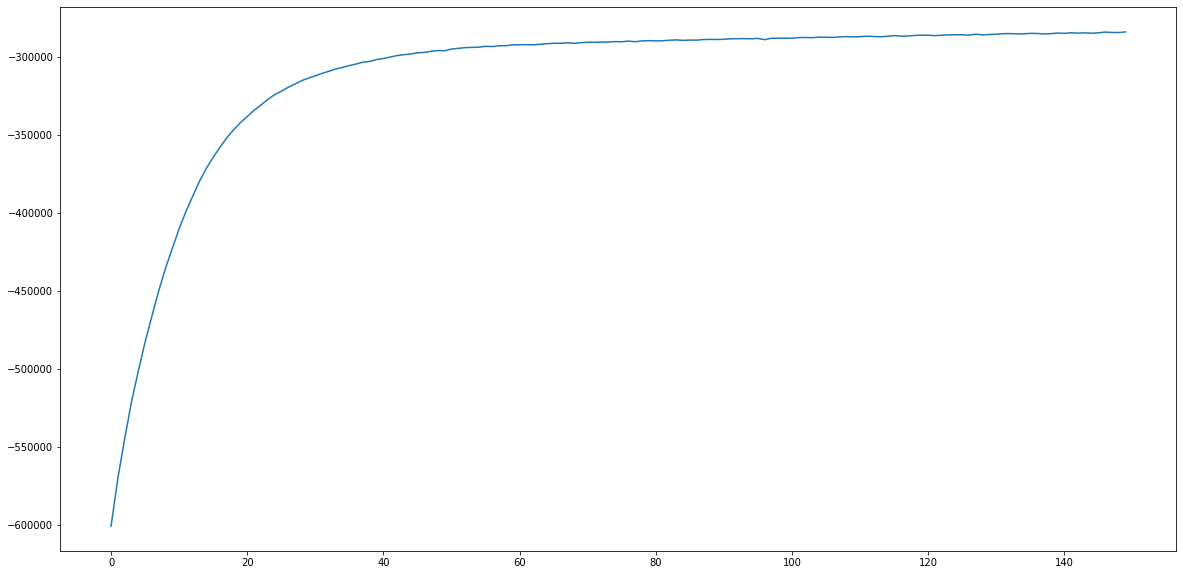

In [15]:
## total loss
plt.plot(np.array(loss)[:,0])

## Label

In [16]:
## output model parameters
#torch.save([loss, Theta], output_theta1)

## damm's doublet performance
with torch.no_grad():
    
    pred_loader = torch.utils.data.DataLoader(ConcatDataset(teFY, teFS), batch_size = 5000, shuffle = False)
    
    damm_p_fake_singlets = []
    for i, bat in enumerate(pred_loader):
        _, _, _ , damm_p_fake_singlet = compute_posteriors_nll_p_singlet(bat[0], bat[1], Theta1, nm, rr)
        damm_p_fake_singlets.append(damm_p_fake_singlet)
        
    ## compute damm performance of simulated data (confusion matrix)
    dtn, dfp, dfn, dtp, dacc, df1, dsens, dspec = evalM(torch.hstack(damm_p_fake_singlets), teFL)
    
    iter_out = [nc, nm, rv, rr, r, 
        rtn, rfp, rfn, rtp, racc, rf1, rsens, rspec,
        dtn, dfp, dfn, dtp, dacc, df1, dsens, dspec]

    ## output doublet performances
    #pd.Series(iter_out).to_csv(odoublet_performance)
    
    ## DAMM label
    damm_pred_singlet_label, damm_pred_singlet_cluster_assig_label, _ = get_assign_labels1(trY, trS, rr, Theta1, nm)    
    damm_sorted_by_count = pd.Series(damm_pred_singlet_cluster_assig_label).value_counts().index
    
    ## save damm labels
    tr_exp.obs['damm_label'] = len(np.unique(damm_pred_singlet_cluster_assig_label))
    tr_exp.obs.iloc[np.where(damm_pred_singlet_label == 0)[0],-1] = np.array(damm_pred_singlet_cluster_assig_label)
    tr_exp.obs['damm_label'] = tr_exp.obs['damm_label'].astype(str)
    
    ## save damm centers
    damm_centers = np.array(torch.hstack([Theta1['log_mu'], Theta1['log_psi'].reshape(-1,1)]).exp())
    
    if len(damm_sorted_by_count) != nc:
        damm_sorted_by_count = np.hstack((damm_sorted_by_count, np.setdiff1d(range(nc), damm_sorted_by_count)))
    damm_centers = damm_centers[damm_sorted_by_count]
    #pd.DataFrame(damm_centers, columns = pretty_printing).to_csv(odamm_centers)

    ## output phenograph/kmeans/damm labels
    #tr_exp.obs.iloc[:,5:].to_csv(olabels)

## Doublet Probability

... storing 'pheno_label' as categorical
... storing 'fsom_label' as categorical
... storing 'kms_label' as categorical
... storing 'damm_label' as categorical


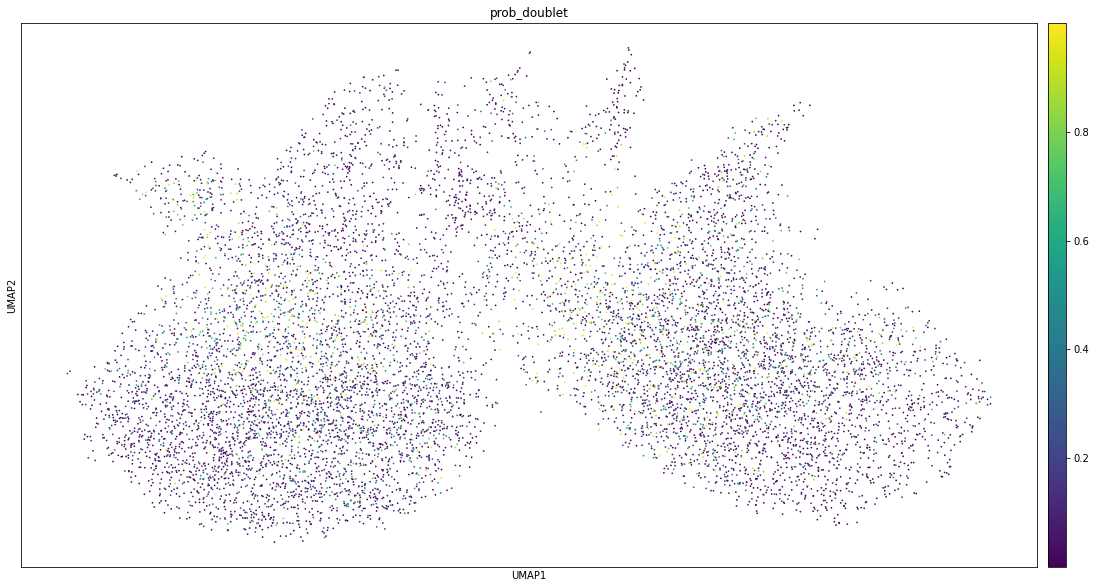

In [17]:
with torch.no_grad():
    _, _, _, p_singlet = compute_posteriors_nll_p_singlet(trY, trS, Theta1, nm, rr)
    
tr_exp.obs['prob_doublet'] = 1 - np.array(p_singlet.detach())
sc.pl.umap(tr_exp, color="prob_doublet")

In [18]:
sum(p_singlet.detach() > 0.5)

tensor(8696)

In [19]:
pd.DataFrame(pheno_centers, columns = pretty_printing)

,B220,CCR7,CD11b,CD11c,CD19,CD28,CD3,CD31,CD4,CD45,...,PNAd,Perforin,RFP,S100A8-9,Stroma,TBET,TCF1,YAP,iNOS,size
0,1.889922,4.344652,2.091115,0.771513,0.515075,0.842714,14.769933,1.619492,0.190826,0.772779,...,0.427879,0.227237,5.396180,0.148981,7.006428,0.570866,8.551962,0.783007,0.329297,36.731723
1,1.492670,2.719060,2.406331,0.548043,0.273541,0.448029,2.757169,1.891242,0.053784,0.747403,...,0.266755,0.115597,1.478903,0.121275,3.905425,0.369486,5.729356,0.669723,0.183711,39.890224
2,1.613500,2.647620,2.102045,0.492098,0.277874,0.448810,2.753612,1.677161,0.053593,0.750022,...,0.242402,0.111217,1.390476,0.111652,3.597699,0.359142,6.058104,0.448177,0.176298,27.087633
3,1.185826,4.409714,1.950717,0.725347,0.388975,0.805021,13.673513,1.586812,0.173537,0.746868,...,0.364725,0.218445,5.156548,0.142029,6.578120,0.534097,8.879271,0.738023,0.316017,21.150794
4,1.545301,4.463713,2.141828,0.851409,0.464906,0.859585,14.598876,1.608198,0.197318,0.749150,...,0.429058,0.231366,5.548995,0.153131,8.618249,0.619361,8.243080,0.789567,0.320770,56.786720
5,4.053882,2.093076,2.327043,0.581651,0.617341,0.354498,2.421665,1.736119,0.051485,0.634655,...,0.326009,0.116261,1.727429,0.117210,3.807700,0.352604,4.042093,0.711873,0.171333,14.937374
6,9.999189,1.164890,2.394353,0.440817,1.515391,0.313058,2.564464,1.693595,0.056927,0.675772,...,0.408156,0.119369,2.082056,0.114302,3.493069,0.382196,2.761545,0.726401,0.183245,37.155811
7,5.895508,1.829530,2.842612,0.557688,1.023125,0.378349,2.884466,1.908023,0.055599,0.683762,...,0.373990,0.126118,2.164397,0.135279,3.886414,0.463335,3.965279,0.884042,0.189705,70.846276
8,1.633146,2.712358,2.506072,0.549848,0.283631,0.438778,2.825093,1.771782,0.054742,0.731758,...,0.242815,0.112709,1.438912,0.127087,3.846356,0.373409,5.442689,0.495212,0.176406,53.290909
9,1.382709,4.823774,2.348024,1.143399,0.469974,0.768484,8.813956,1.559536,0.155795,0.623912,...,0.465236,0.215305,5.952412,0.164526,19.746058,0.570136,5.941786,1.030830,0.296989,30.535270


In [20]:
pd.DataFrame(fs_centers, columns = fsom.df.columns[:-1])

,B220,CCR7,CD11b,CD11c,CD19,CD28,CD3,CD31,CD4,CD45,...,PNAd,Perforin,RFP,S100A8-9,Stroma,TBET,TCF1,YAP,iNOS,size
0,3.135166,2.283539,2.264096,0.567221,0.497627,0.410890,2.683783,1.774140,0.056251,0.686772,...,0.412619,0.117764,1.750000,0.119673,4.052262,0.370124,4.877271,0.686625,0.177620,26.084989
1,3.227410,2.419259,2.311737,0.502378,0.547184,0.426470,2.783712,1.780851,0.055382,0.736677,...,0.338587,0.115721,1.612651,0.116388,3.713614,0.373374,5.252245,0.601241,0.183254,39.206612
2,3.309469,2.374805,2.567672,0.555157,0.570062,0.429467,2.989687,1.874114,0.058389,0.722128,...,0.434711,0.119830,1.831202,0.127956,4.020598,0.412373,4.963535,0.732777,0.185295,56.543714
3,1.229433,4.440842,1.918106,0.625499,0.386077,0.842991,14.875692,1.593600,0.192724,0.775013,...,0.380884,0.223649,5.111940,0.142041,6.323267,0.521875,9.188530,0.696064,0.322422,28.272642
4,1.344214,4.456213,2.115504,0.867170,0.428726,0.861005,14.016771,1.600199,0.198771,0.733827,...,0.454284,0.227114,5.492780,0.153589,8.404385,0.587206,8.258944,0.804220,0.320469,53.110985
5,1.781763,4.137761,2.202317,0.978951,0.512655,0.758072,10.978937,1.625038,0.172101,0.669370,...,0.810379,0.213289,5.625503,0.149624,10.839504,0.540532,6.982006,0.990088,0.303617,39.668210
6,7.092312,1.721798,2.067771,0.457736,1.134246,0.370268,3.378181,1.675241,0.062407,0.696923,...,0.439017,0.121209,2.205477,0.108966,3.679941,0.362004,3.984183,0.708239,0.191138,16.750403
7,4.533442,3.064693,2.555457,0.746400,0.904390,0.644682,9.657514,1.783966,0.135511,0.731362,...,0.653869,0.194851,4.304700,0.150120,6.502594,0.606921,6.052612,0.886485,0.269858,78.299401
8,1.597932,4.691716,2.118868,0.700214,0.463601,0.899534,17.981393,1.714911,0.192720,0.843195,...,0.420104,0.246584,5.660279,0.151848,6.737232,0.628560,9.229011,0.754913,0.344699,40.478079
9,1.213234,4.277832,1.991446,0.646290,0.394080,0.787114,13.305851,1.646957,0.167060,0.760267,...,0.423486,0.214500,5.066847,0.133721,6.271700,0.560814,9.389319,0.777705,0.311898,16.241935


In [21]:
pd.DataFrame(okms_centers, columns = pretty_printing)

,B220,CCR7,CD11b,CD11c,CD19,CD28,CD3,CD31,CD4,CD45,...,PNAd,Perforin,RFP,S100A8-9,Stroma,TBET,TCF1,YAP,iNOS,size
0,2.427057,2.503805,2.339295,0.520997,0.405875,0.430486,2.763294,1.816842,0.055411,0.729732,...,0.346811,0.115517,1.576735,0.119323,3.843210,0.362268,5.323644,0.639364,0.182066,38.187015
1,1.628563,2.588964,2.163552,0.557934,0.286782,0.450107,2.888620,1.727705,0.056642,0.723273,...,0.303504,0.114888,1.589860,0.114559,3.891922,0.371196,5.750648,0.563709,0.180650,26.243143
2,1.355659,4.252418,2.000252,0.759347,0.415046,0.808017,12.853403,1.542053,0.185754,0.719228,...,0.430881,0.212634,5.171502,0.140822,7.216830,0.517628,8.266296,0.749360,0.320582,33.185610
3,3.151147,2.310855,2.352672,0.601109,0.542393,0.399168,3.226364,1.759317,0.062214,0.640183,...,0.489232,0.126733,2.234236,0.124422,4.402896,0.390973,4.518041,0.786043,0.188981,12.909295
4,1.334703,4.532972,2.190879,0.927931,0.430104,0.829287,12.406976,1.621310,0.185327,0.712282,...,0.603661,0.223182,5.650045,0.156011,10.329401,0.586186,7.726035,0.898759,0.317340,46.940828
5,2.481182,2.489534,2.508371,0.546954,0.410141,0.444422,2.962883,1.820035,0.057851,0.734581,...,0.323101,0.116731,1.624515,0.125647,3.863144,0.394744,5.315519,0.614128,0.183697,50.606318
6,1.197114,4.538754,1.956783,0.666734,0.393843,0.833157,15.080244,1.645441,0.180154,0.780099,...,0.381190,0.229618,5.204250,0.142193,6.231853,0.550822,9.466891,0.737650,0.322203,20.175810
7,4.510283,2.125296,2.715571,0.615708,0.812724,0.420185,3.263376,1.912045,0.063871,0.687608,...,0.621558,0.129892,2.295884,0.132156,4.526166,0.453541,4.460115,0.882014,0.194310,64.843691
8,1.831048,4.719790,2.107008,0.616713,0.502617,0.929113,19.564402,1.764371,0.207528,0.888039,...,0.460688,0.257083,5.728556,0.159330,6.404146,0.615616,9.703989,0.754596,0.341086,37.715706
9,1.473510,4.604154,2.166630,0.844346,0.453859,0.890653,15.950732,1.675284,0.206233,0.772602,...,0.524709,0.237539,5.757288,0.156829,8.226238,0.633065,8.715049,0.808559,0.333062,61.106472


In [22]:
#pd.DataFrame(okms_centers[singlet_indices], columns = pretty_printing)

In [23]:
pd.DataFrame(damm_centers, columns = pretty_printing)

,B220,CCR7,CD11b,CD11c,CD19,CD28,CD3,CD31,CD4,CD45,...,PNAd,Perforin,RFP,S100A8-9,Stroma,TBET,TCF1,YAP,iNOS,size
0,0.437326,2.696585,1.414190,0.292785,0.123345,0.433360,2.452068,1.554822,0.040395,0.738970,...,0.211241,0.095760,1.250976,0.085174,3.122618,0.211430,6.338731,0.283909,0.153399,28.501133
1,0.422390,3.621094,1.411866,0.396493,0.245116,0.698278,13.152826,1.353066,0.151140,0.633925,...,0.280068,0.187496,4.627004,0.116694,5.977222,0.307148,8.077679,0.582965,0.266185,30.020962
2,0.500348,5.320970,2.197924,0.586482,0.314281,1.010409,15.211277,1.767623,0.200302,0.842098,...,0.332804,0.257536,6.217617,0.158088,7.684881,0.533047,9.498679,0.792489,0.375152,31.070251
3,1.287719,2.628158,2.965859,0.704913,0.261562,0.492572,2.657069,1.912052,0.053841,0.818574,...,0.262513,0.126411,1.690878,0.145761,4.709773,0.348120,5.274572,0.528174,0.205121,30.729103
4,6.872144,0.754310,1.688346,0.202220,0.876992,0.184159,1.379007,1.569589,0.024497,0.583803,...,0.223043,0.082090,1.054352,0.080123,2.596129,0.187109,1.782841,0.483353,0.121015,29.937031
5,8.431285,0.880972,1.363897,0.226813,2.006538,0.340759,4.391099,1.414439,0.065028,0.531917,...,0.424801,0.157392,3.991532,0.088489,3.835884,0.439769,1.570311,0.989183,0.222338,32.025305
6,1.184338,4.251495,2.729249,1.093107,0.467149,0.826793,10.150998,1.510788,0.167301,0.646528,...,0.325560,0.284372,6.566096,0.178819,16.820198,0.594891,5.210617,0.974144,0.283709,42.910340
7,6.117741,1.631359,3.025120,1.204271,1.230938,0.602711,12.601453,1.623556,0.182157,0.676863,...,0.523769,0.193925,5.828158,0.180947,6.943322,0.606173,4.654827,1.039742,0.297522,30.887601
8,5.664970,1.300144,2.383506,0.267729,1.337762,0.495933,5.325325,4.224731,0.078248,0.756807,...,5.332422,0.215464,9.346538,0.154253,11.065852,0.897571,3.559514,2.267784,0.300148,39.844016
9,1.328690,2.091034,1.917782,0.385110,0.246774,0.350846,2.519239,1.576995,0.064057,0.615578,...,0.214811,0.090608,1.147196,0.082047,3.096163,0.226369,3.946942,0.348475,0.170971,56.897827


# Expression Heatmap (scaled)

In [24]:
scaler = MinMaxScaler()
#s2 = scaler.fit(np.vstack([pheno_centers, fsom_centers, okms_centers, okms_centers[singlet_indices], damm_centers]))
s2 = scaler.fit(np.vstack([pheno_centers, fs_centers, okms_centers, damm_centers]))

#s2 = scaler.fit(np.vstack([pheno_centers, fs_centers, damm_centers]))

## PhenoGraph

Text(156.0, 0.5, 'Cluster')

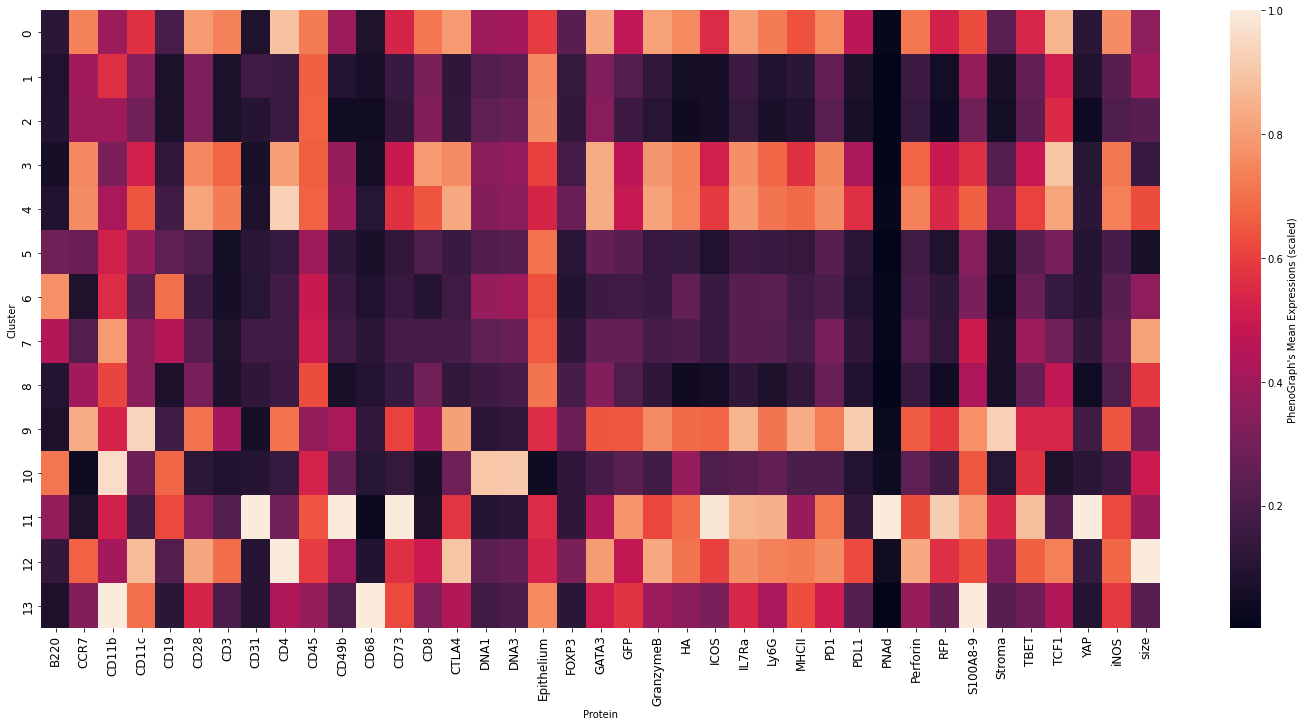

In [25]:
s3 = scaler.transform(pheno_centers)
mat = pd.DataFrame(s3, columns = pretty_printing)
ax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={'label': "PhenoGraph's Mean Expressions (scaled)"})
ax.set_xticklabels(ax.get_xticklabels(), size = 12, horizontalalignment = 'center')
ax.set_yticklabels(ax.get_yticklabels(), size = 12, verticalalignment = 'center')
ax.figure.tight_layout()
plt.xlabel("Protein")
plt.ylabel("Cluster")

### Doublet Prob

In [26]:
rf.predict_proba(pheno_centers)[:,0]

array([0.5 , 0.65, 0.4 , 0.35, 0.91, 0.4 , 0.85, 0.99, 0.96, 0.4 , 0.8 ,
       0.3 , 0.98, 0.84])

## FlowSOM

Text(156.0, 0.5, 'Cluster')

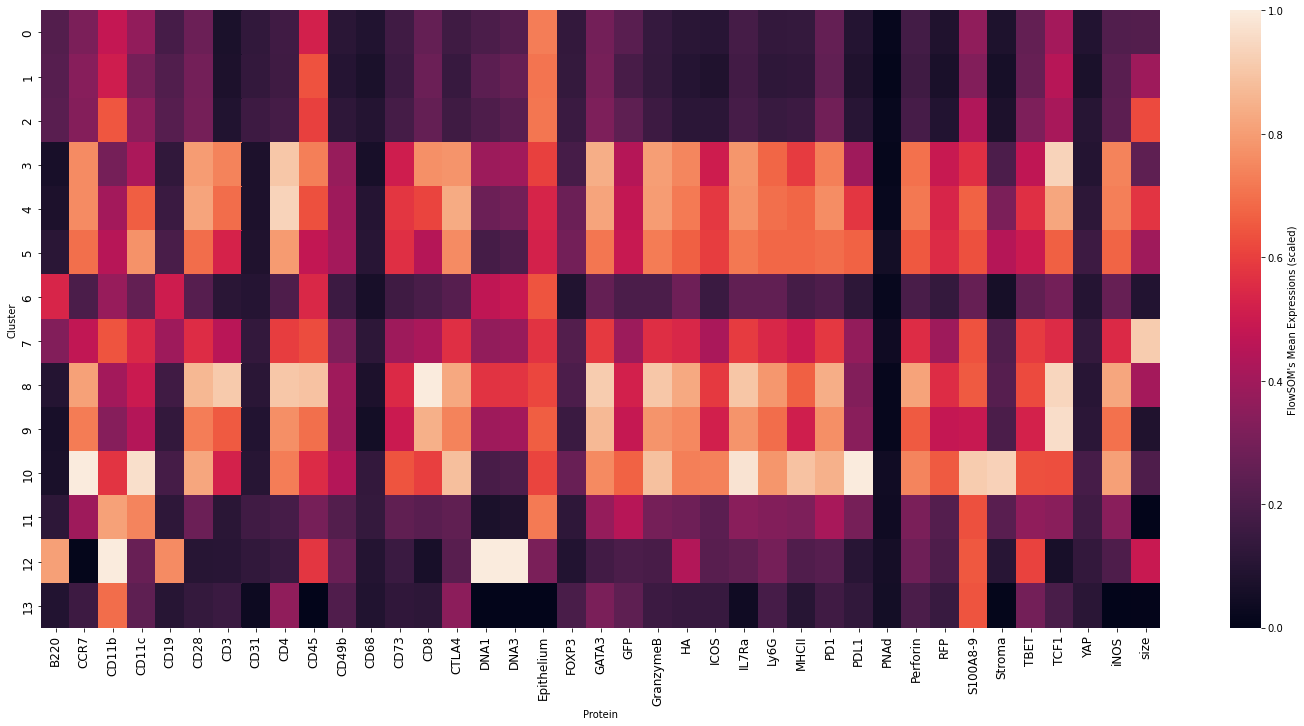

In [27]:
s3 = scaler.transform(fs_centers)
mat = pd.DataFrame(s3, columns = pretty_printing)
ax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={'label': "FlowSOM's Mean Expressions (scaled)"})
ax.set_xticklabels(ax.get_xticklabels(), size = 12, horizontalalignment = 'center')
ax.set_yticklabels(ax.get_yticklabels(), size = 12, verticalalignment = 'center')
ax.figure.tight_layout()
plt.xlabel("Protein")
plt.ylabel("Cluster")

### Doublet Prob

In [28]:
rf.predict_proba(fs_centers)[:,0]

array([0.48, 0.81, 0.96, 0.39, 0.89, 0.74, 0.54, 1.  , 0.54, 0.29, 0.36,
       0.49, 0.74, 0.35])

## Kmeans

Text(156.0, 0.5, 'Cluster')

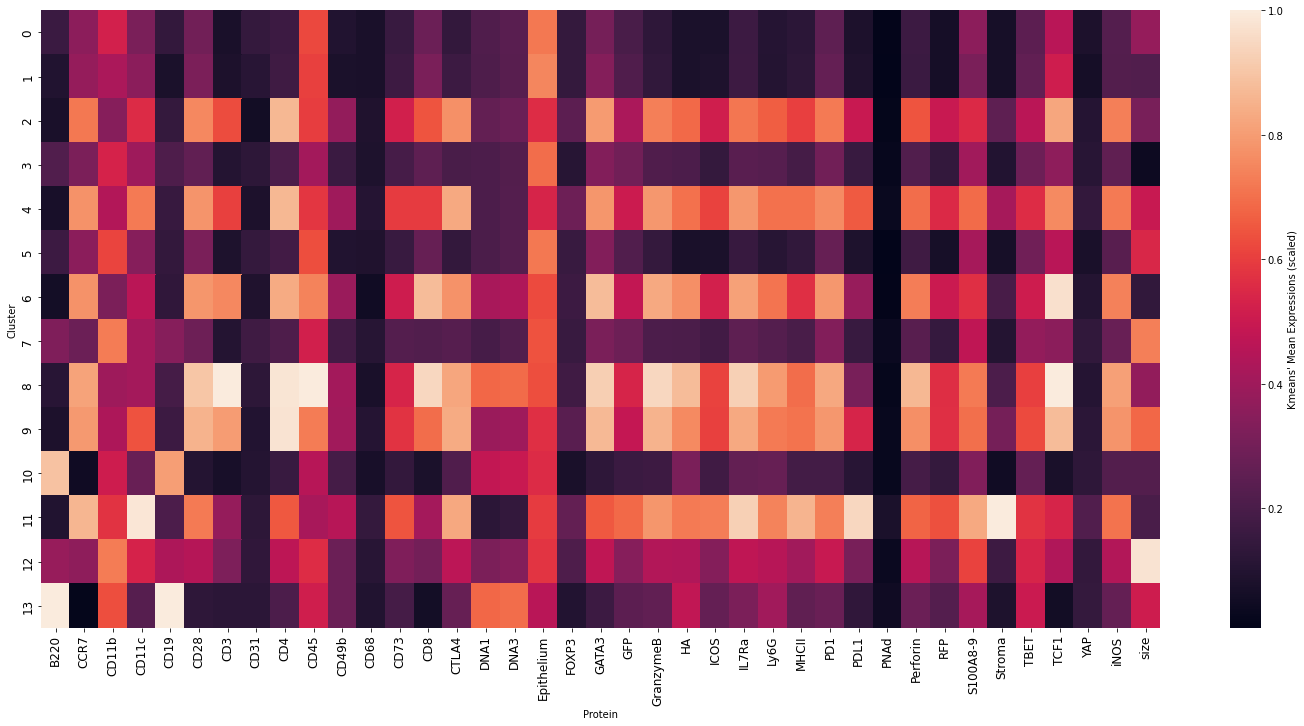

In [29]:
s3 = scaler.transform(okms_centers)
mat = pd.DataFrame(s3, columns = pretty_printing)
ax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={'label': "Kmeans' Mean Expressions (scaled)"})
ax.set_xticklabels(ax.get_xticklabels(), size = 12, horizontalalignment = 'center')
ax.set_yticklabels(ax.get_yticklabels(), size = 12, verticalalignment = 'center')
ax.figure.tight_layout()
plt.xlabel("Protein")
plt.ylabel("Cluster")

### Doublet Prob

In [30]:
rf.predict_proba(okms_centers)[:,0]

array([0.71, 0.44, 0.58, 0.51, 0.84, 0.92, 0.33, 0.99, 0.4 , 0.97, 0.59,
       0.35, 1.  , 0.95])

# RF on Kmeans

In [31]:
'''
s3 = scaler.transform(okms_centers[singlet_indices])
mat = pd.DataFrame(s3, columns = pretty_printing)
ax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={'label': "RF on Kmeans' Mean Expressions (scaled)"})
ax.set_xticklabels(ax.get_xticklabels(), size = 12, horizontalalignment = 'center')
ax.set_yticklabels(ax.get_yticklabels(), size = 12, verticalalignment = 'center')
ax.figure.tight_layout()
plt.xlabel("Protein")
plt.ylabel("Cluster")
'''

'\ns3 = scaler.transform(okms_centers[singlet_indices])\nmat = pd.DataFrame(s3, columns = pretty_printing)\nax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={\'label\': "RF on Kmeans\' Mean Expressions (scaled)"})\nax.set_xticklabels(ax.get_xticklabels(), size = 12, horizontalalignment = \'center\')\nax.set_yticklabels(ax.get_yticklabels(), size = 12, verticalalignment = \'center\')\nax.figure.tight_layout()\nplt.xlabel("Protein")\nplt.ylabel("Cluster")\n'

In [32]:
#rf.predict_proba(okms_centers[singlet_indices])[:,0]

## DAMM

Text(156.0, 0.5, 'Cluster')

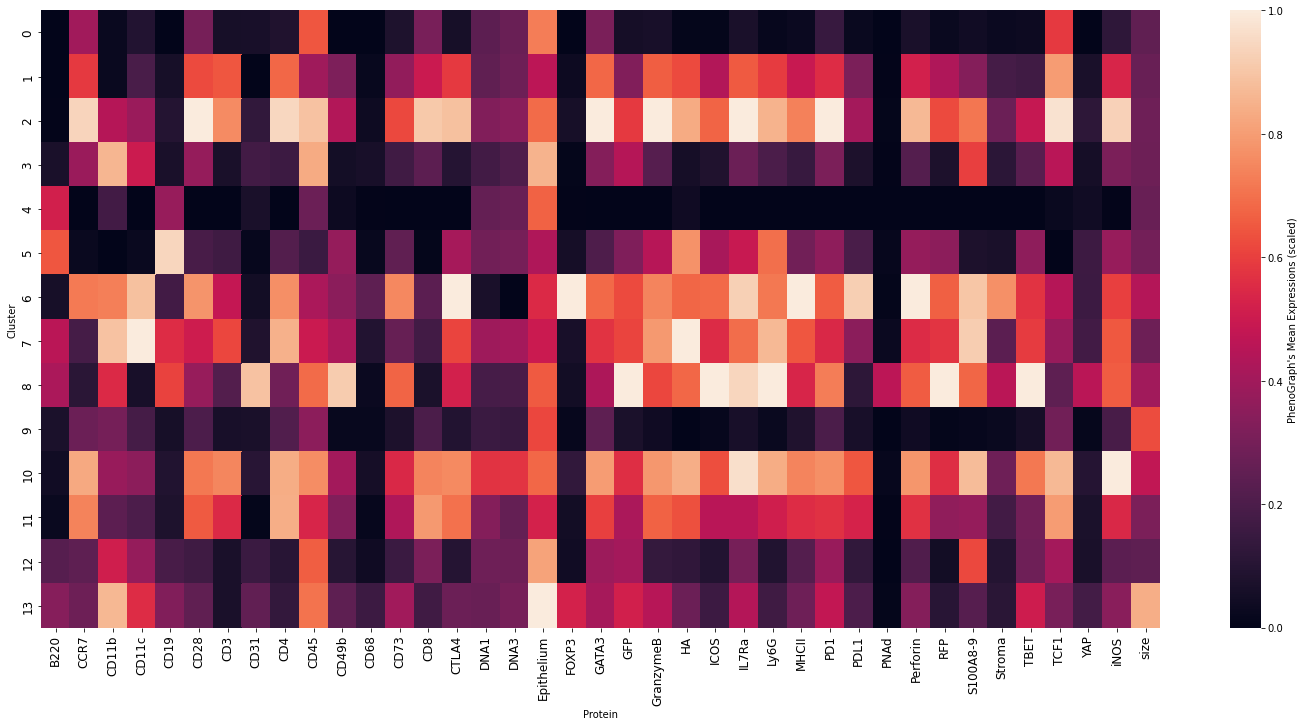

In [33]:
s3 = scaler.transform(damm_centers)
mat = pd.DataFrame(s3, columns = pretty_printing)
ax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={'label': "PhenoGraph's Mean Expressions (scaled)"})
ax.set_xticklabels(ax.get_xticklabels(), size = 12, horizontalalignment = 'center')
ax.set_yticklabels(ax.get_yticklabels(), size = 12, verticalalignment = 'center')
ax.figure.tight_layout()
plt.xlabel("Protein")
plt.ylabel("Cluster")

### Doublet Prob

In [34]:
rf.predict_proba(damm_centers)[:,0]

array([0.23, 0.25, 0.28, 0.36, 0.27, 0.27, 0.4 , 0.3 , 0.37, 0.95, 0.7 ,
       0.65, 0.55, 0.93])

# UMAP of PhenoGraph/FlowSOM/Kmeans/DAMM clusters

In [35]:
## compute neighbors for UMAP
sc.pp.neighbors(tr_exp, use_rep='X')
sc.tl.umap(tr_exp)

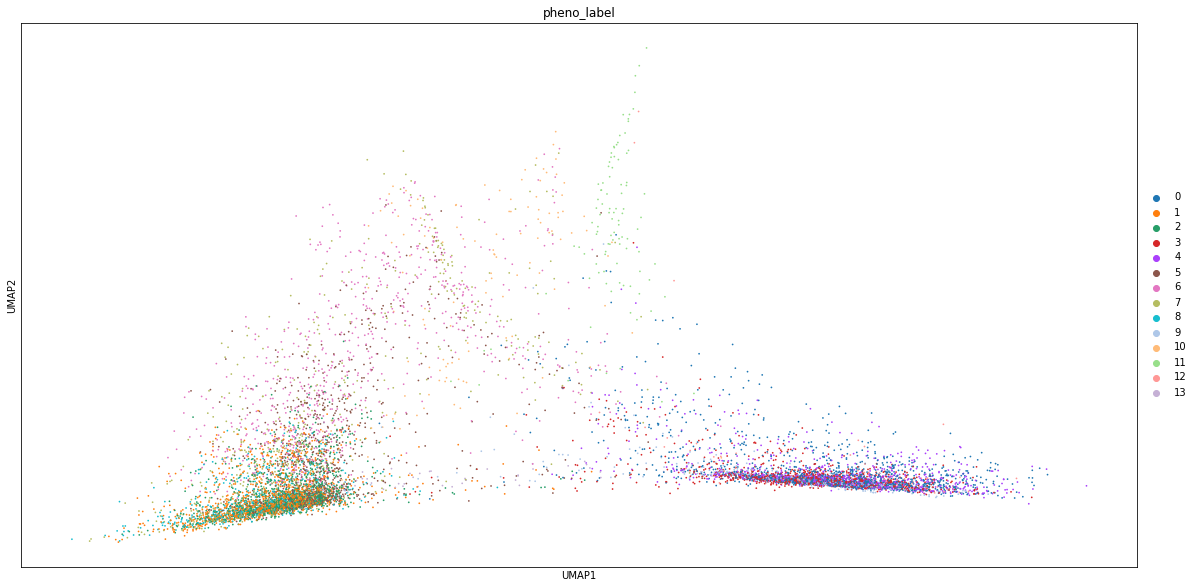

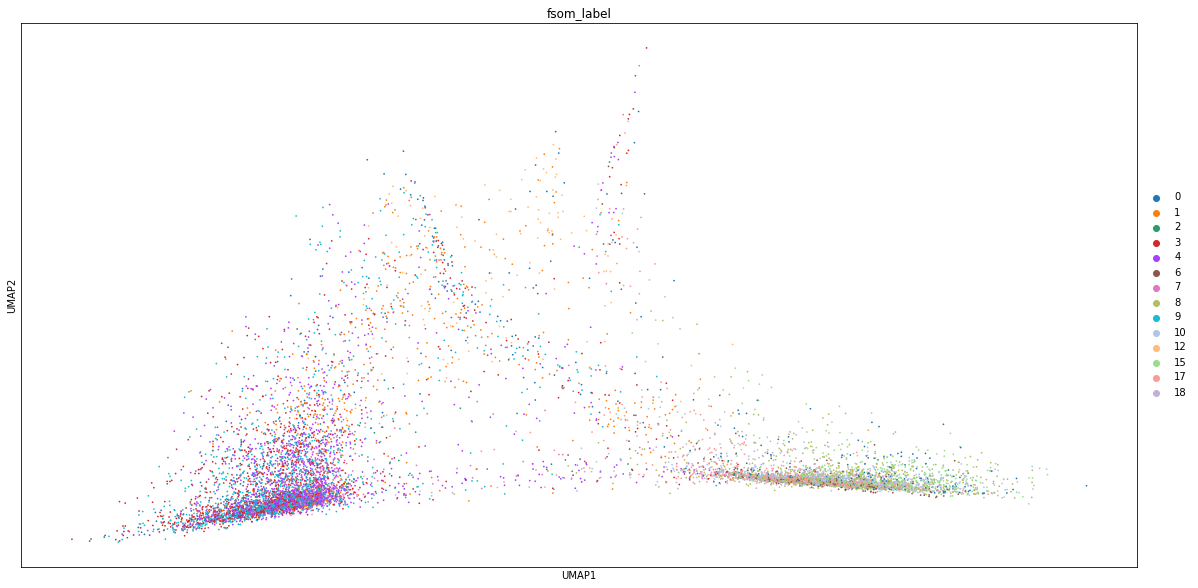

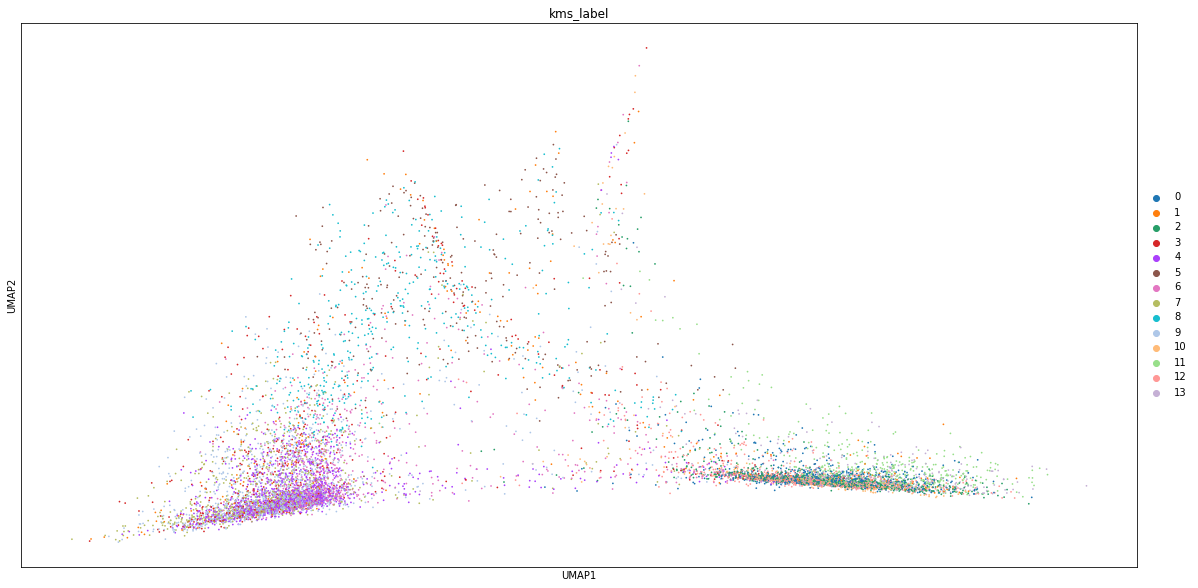

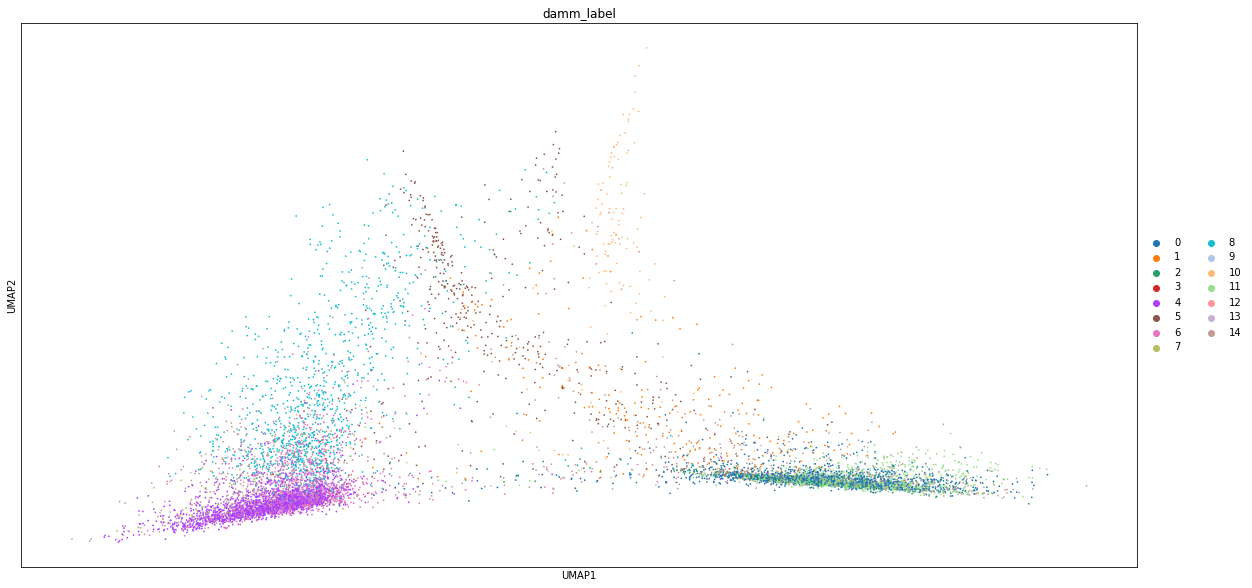

In [36]:
sc.pl.umap(tr_exp, color="pheno_label")
sc.pl.umap(tr_exp, color="fsom_label")
sc.pl.umap(tr_exp, color="kms_label")
sc.pl.umap(tr_exp, color="damm_label")

# New Correlation

In [37]:
def newMetric2(mat1, mat2, anti, pairs, thresholds, gp=1):
    out = []
    for pair in pairs:

        x_name = pair[0]; y_name = pair[1]
        #x = np.array(pheno_mat[x_name]); y = np.array(pheno_mat[y_name])
        #x = np.array(damm_mat[x_name]); y = np.array(damm_mat[y_name])
        x1 = np.array(mat1[x_name]); y1 = np.array(mat1[y_name])
        x2 = np.array(mat2[x_name]); y2 = np.array(mat2[y_name])
    
        if anti:
            ## case 1: negative
            score1 = sum((x1 < thresholds[x_name][0]) | (y1 < thresholds[y_name][0]))/len(x1)
            score2 = sum((x2 < thresholds[x_name][0]) | (y2 < thresholds[y_name][0]))/len(x2)
            out.append([x_name + '_' + y_name, score1, score2, 0])
        else:
            ## case 2: positive
            score1 = sum((x1 > thresholds[x_name][1]) | (y1 < thresholds[y_name][0]))/len(x1)
            score2 = sum((x2 > thresholds[x_name][1]) | (y2 < thresholds[y_name][0]))/len(x2)
            out.append([x_name + '_' + y_name, score1, score2, 1])
            
        print("{}_{} -- PG: {}; DAMM: {}".format(x_name, y_name, score1, score2))
        
        '''
        plt.scatter(x1, y1)
        plt.axvline(x=thresholds[x_name][0], color='r')
        plt.axvline(x=thresholds[x_name][1], color='r')    
        plt.axhline(y=thresholds[y_name][0], color='r')
        plt.axhline(y=thresholds[y_name][1], color='r')
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.title("PhenoGraph anti: {}".format(anti))
        plt.show()
        
        plt.scatter(x2, y2)
        plt.axvline(x=thresholds[x_name][0], color='r')
        plt.axvline(x=thresholds[x_name][1], color='r')    
        plt.axhline(y=thresholds[y_name][0], color='r')
        plt.axhline(y=thresholds[y_name][1], color='r')
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.title("DAMM anti: {}".format(anti))
        plt.show()
        '''
    if gp:
        out_col = ['pair', 'PhenoGraph', 'DAMM', 'type']
    else:
        out_col = ['pair', 'FlowSOM', 'DAMM', 'type']
    return pd.DataFrame(out, columns = out_col)

In [38]:
thresholds = pd.DataFrame(np.quantile(tr_exp[:,analysisProteins].X, [0.25, 0.75], axis=0), columns = pretty_printing[:-1])

In [39]:
thresholds

,B220,CCR7,CD11b,CD11c,CD19,CD28,CD3,CD31,CD4,CD45,...,PDL1,PNAd,Perforin,RFP,S100A8-9,Stroma,TBET,TCF1,YAP,iNOS
0,0.372435,1.666667,1.333333,0.200000,0.166667,0.333333,2.230769,1.358974,0.032258,0.562500,...,0.666667,0.189873,0.086957,1.310345,0.066667,3.069567,0.200000,4.00000,0.352941,0.142857
1,3.714286,4.333333,2.629630,0.805556,0.651416,0.785714,12.286401,1.875000,0.162791,0.866667,...,2.812500,0.375000,0.225806,5.166667,0.179487,7.083333,0.583333,8.37037,0.853659,0.322081


In [40]:
anti_pairs = [['CD3','CD19'],
              ['CD3','CD68'],
              ['CD4','CD8'],
              ['CD4','CD19'],
              ['CD4','CD68'],
              ['CD8','CD11b'],
              ['CD8','CD19'],
              ['CD8','CD68'],
              ['CD19','CD68']]
    
co_pairs = [['CD3','CD4'],
            ['CD3','CD8'],
            ['CD45','CD3'],
            ['CD45','CD4'],
            ['CD45','CD8'],
            ['CD45','CD19'],
            ['CD45','CD68']]

In [41]:
#!pip install --upgrade matplotlib>=3.3.4

In [42]:
pheno_mat = pd.DataFrame(pheno_centers, columns = pretty_printing)
damm_mat = pd.DataFrame(damm_centers, columns = pretty_printing)
anti = newMetric2(pheno_mat, damm_mat, 1, anti_pairs, thresholds, 1)
co = newMetric2(pheno_mat, damm_mat, 0, co_pairs, thresholds, 1)
df = pd.concat([anti, co])

CD3_CD19 -- PG: 0.0; DAMM: 0.14285714285714285
CD3_CD68 -- PG: 0.0; DAMM: 0.14285714285714285
CD4_CD8 -- PG: 0.14285714285714285; DAMM: 0.21428571428571427
CD4_CD19 -- PG: 0.0; DAMM: 0.14285714285714285
CD4_CD68 -- PG: 0.0; DAMM: 0.14285714285714285
CD8_CD11b -- PG: 0.14285714285714285; DAMM: 0.21428571428571427
CD8_CD19 -- PG: 0.14285714285714285; DAMM: 0.2857142857142857
CD8_CD68 -- PG: 0.14285714285714285; DAMM: 0.2857142857142857
CD19_CD68 -- PG: 0.0; DAMM: 0.07142857142857142
CD3_CD4 -- PG: 0.2857142857142857; DAMM: 0.35714285714285715
CD3_CD8 -- PG: 0.42857142857142855; DAMM: 0.5
CD45_CD3 -- PG: 0.0; DAMM: 0.07142857142857142
CD45_CD4 -- PG: 0.0; DAMM: 0.07142857142857142
CD45_CD8 -- PG: 0.14285714285714285; DAMM: 0.21428571428571427
CD45_CD19 -- PG: 0.0; DAMM: 0.07142857142857142
CD45_CD68 -- PG: 0.0; DAMM: 0.07142857142857142


Text(0.5, 0.98, 'eddy: Correlation Alternative')

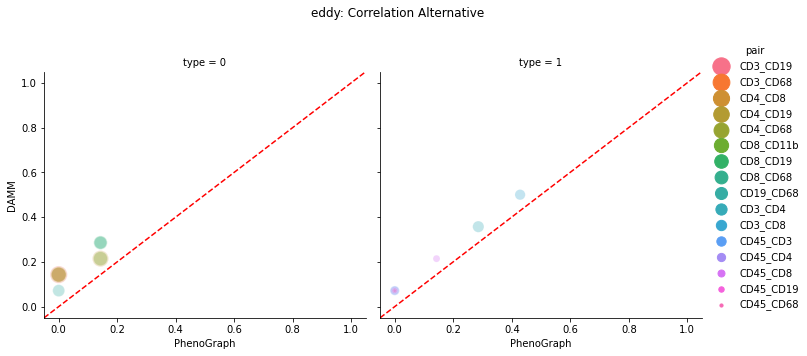

In [43]:
rel = sns.relplot(data=df, x='PhenoGraph', y='DAMM', col='type', hue='pair', size="pair", sizes=(10, 300), alpha = 0.3)
#rel = sns.relplot(data=df, x='PhenoGraph', y='DAMM', col='type', hue='pair')
for ax in rel.axes_dict.values():
    ax.axline((0, 0), (1,1), ls="--", color ='red')
#rel.data = df  # Hack needed to work around bug on v0.11, fixed in v0.12.dev
#rel.map(sns.lineplot, 'PhenoGraph', 'DAMM')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('{}: Correlation Alternative'.format(cohort))

In [44]:
fs_mat = pd.DataFrame(fs_centers, columns = pretty_printing)
anti = newMetric2(fs_mat, damm_mat, 1, anti_pairs, thresholds, 0)
co = newMetric2(fs_mat, damm_mat, 0, co_pairs, thresholds, 0)
df = pd.concat([anti, co]) 

CD3_CD19 -- PG: 0.0; DAMM: 0.14285714285714285
CD3_CD68 -- PG: 0.0; DAMM: 0.14285714285714285
CD4_CD8 -- PG: 0.07142857142857142; DAMM: 0.21428571428571427
CD4_CD19 -- PG: 0.0; DAMM: 0.14285714285714285
CD4_CD68 -- PG: 0.0; DAMM: 0.14285714285714285
CD8_CD11b -- PG: 0.07142857142857142; DAMM: 0.21428571428571427
CD8_CD19 -- PG: 0.07142857142857142; DAMM: 0.2857142857142857
CD8_CD68 -- PG: 0.07142857142857142; DAMM: 0.2857142857142857
CD19_CD68 -- PG: 0.0; DAMM: 0.07142857142857142
CD3_CD4 -- PG: 0.2857142857142857; DAMM: 0.35714285714285715
CD3_CD8 -- PG: 0.35714285714285715; DAMM: 0.5
CD45_CD3 -- PG: 0.0; DAMM: 0.07142857142857142
CD45_CD4 -- PG: 0.0; DAMM: 0.07142857142857142
CD45_CD8 -- PG: 0.07142857142857142; DAMM: 0.21428571428571427
CD45_CD19 -- PG: 0.0; DAMM: 0.07142857142857142
CD45_CD68 -- PG: 0.0; DAMM: 0.07142857142857142


Text(0.5, 0.98, 'eddy: Correlation Alternative')

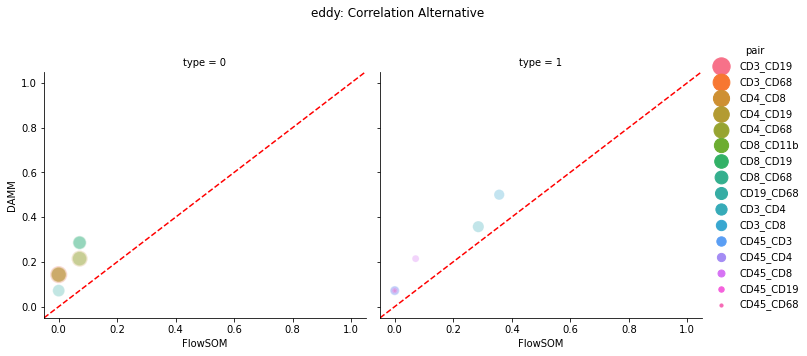

In [45]:
rel = sns.relplot(data=df, x='FlowSOM', y='DAMM', col='type', hue='pair', size="pair", sizes=(10, 300), alpha = 0.3)
#rel = sns.relplot(data=df, x='PhenoGraph', y='DAMM', col='type', hue='pair')
for ax in rel.axes_dict.values():
    ax.axline((0, 0), (1,1), ls="--", color ='red')
#rel.data = df  # Hack needed to work around bug on v0.11, fixed in v0.12.dev
#rel.map(sns.lineplot, 'PhenoGraph', 'DAMM')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('{}: Correlation Alternative'.format(cohort))

# ARS of PhenoGraph/FlowSOM/Kmeans/DAMM

In [46]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(tr_exp.obs['pheno_label'], tr_exp.obs['fsom_label'])

0.41247100784239943

In [47]:
adjusted_rand_score(tr_exp.obs['pheno_label'], tr_exp.obs['kms_label'])

0.5019378797487014

In [48]:
adjusted_rand_score(tr_exp.obs['pheno_label'], tr_exp.obs['damm_label'])

0.19459803802471573

In [49]:
adjusted_rand_score(tr_exp.obs['fsom_label'], tr_exp.obs['kms_label'])

0.5118930621970624

In [50]:
adjusted_rand_score(tr_exp.obs['fsom_label'], tr_exp.obs['damm_label'])

0.15453265025246213

In [51]:
adjusted_rand_score(tr_exp.obs['kms_label'], tr_exp.obs['damm_label'])

0.1628105302860708

# Cell sizes by cluster

<AxesSubplot:xlabel='cluster', ylabel='size'>

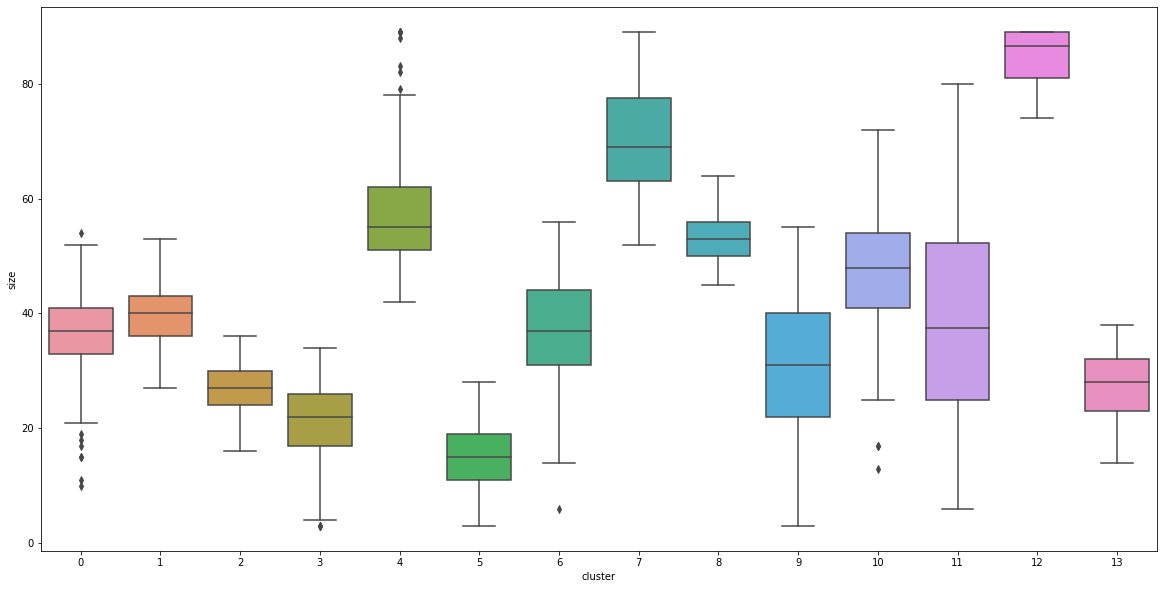

In [52]:
## phenograph
d1 = pd.DataFrame({'cluster': range(pheno_centers.shape[0]), 'psi': pheno_centers[:,-1]})
d2 = pd.DataFrame({'size': trS, 'cluster': pheno_labels})
d3 = d2.merge(d1, on='cluster')
sns.boxplot(x = 'cluster', y = 'size', data = d3)

<AxesSubplot:xlabel='cluster', ylabel='size'>

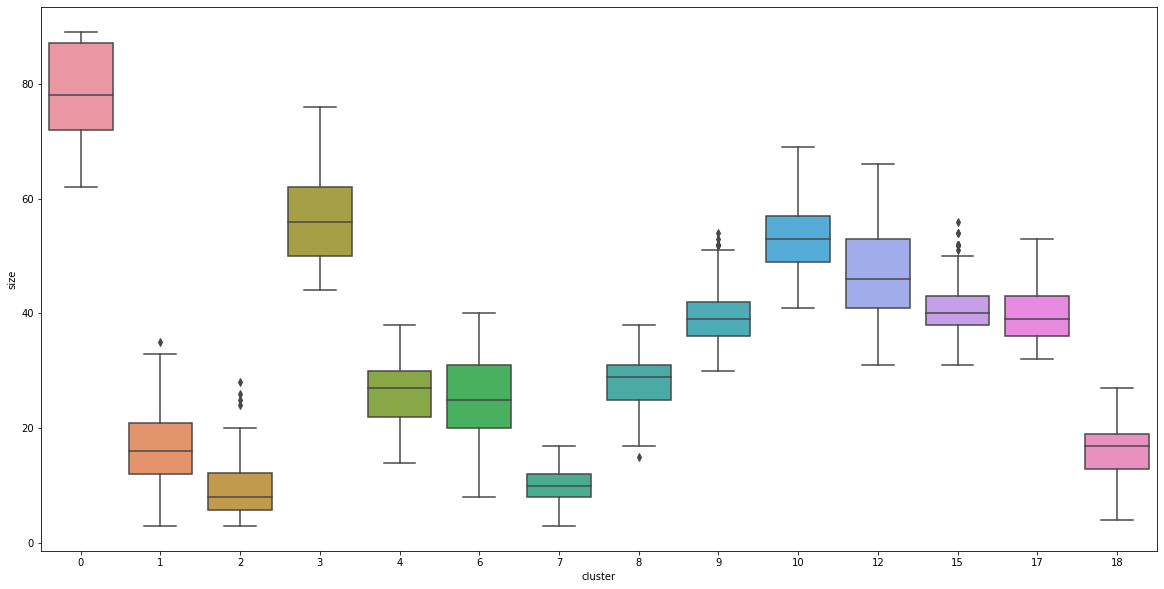

In [53]:
## FlowSOM
d1 = pd.DataFrame({'cluster': fsom_sorted_by_count, 'psi': fs_centers[:,-1]})
d2 = pd.DataFrame({'size': trS, 'cluster': fsom_labels})
d3 = d2.merge(d1, on='cluster')
sns.boxplot(x = 'cluster', y = 'size', data = d3)

<AxesSubplot:xlabel='cluster', ylabel='size'>

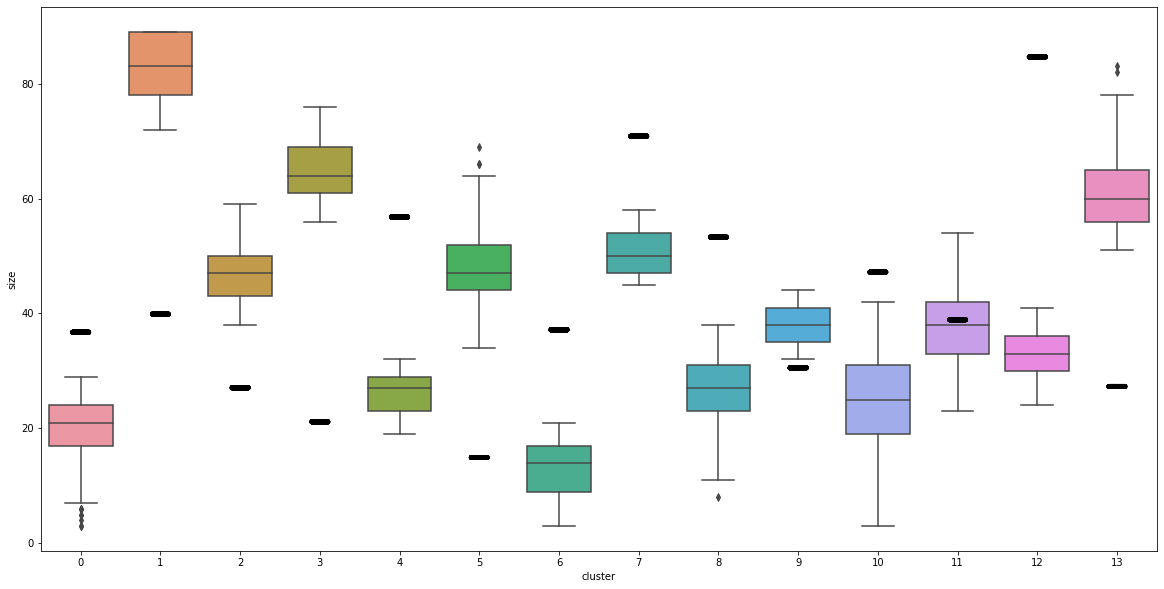

In [54]:
## kmeans
d1 = pd.DataFrame({'cluster': range(pheno_centers.shape[0]), 'psi': pheno_centers[:,-1]})
d2 = pd.DataFrame({'size': trS, 'cluster': okms_labels})
d3 = d2.merge(d1, on='cluster')

sns.stripplot(x = 'cluster', y = 'psi', data = d3, color = 'black')
sns.boxplot(x = 'cluster', y = 'size', data = d3)

<AxesSubplot:xlabel='cluster', ylabel='size'>

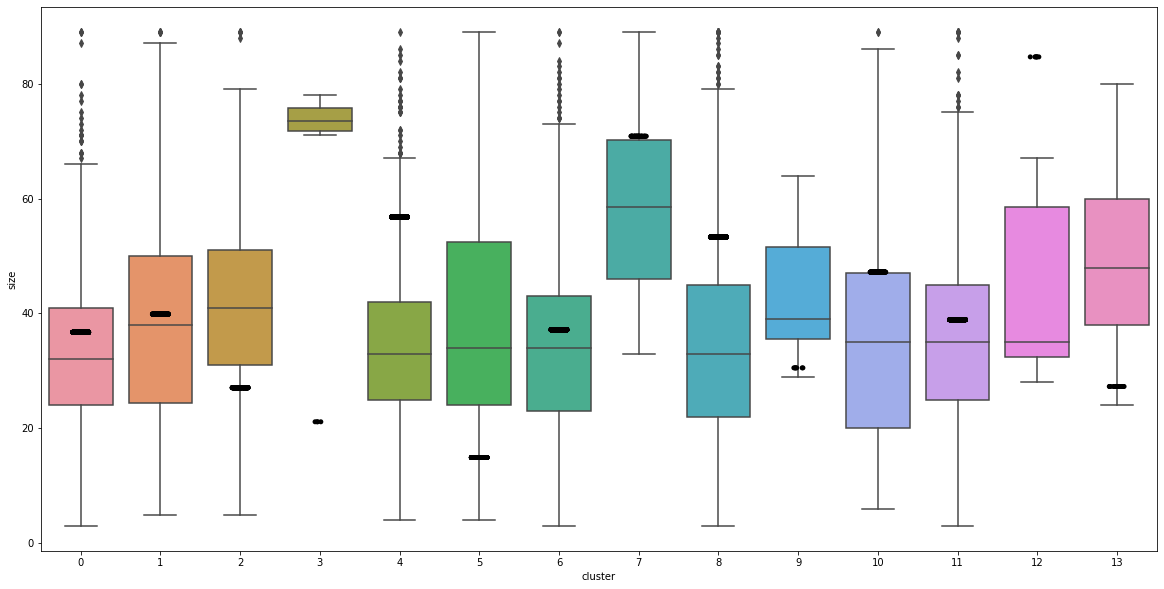

In [55]:
## damm
d1 = pd.DataFrame({'cluster': range(pheno_centers.shape[0]), 'psi': pheno_centers[:,-1]})
d2 = pd.DataFrame({'size': np.array(trS[damm_pred_singlet_label == 0]), 
                   'cluster': damm_pred_singlet_cluster_assig_label})
d3 = d2.merge(d1, on='cluster')

sns.stripplot(x = 'cluster', y = 'psi', data = d3, color = 'black')
sns.boxplot(x = 'cluster', y = 'size', data = d3)